# Презентация
#### Мокров Пётр, Койляк Евгений, Халайджи Александр

\begin{equation*}
    \textbf{prob}(X = 1) = p = \frac{exp(a^Tx + b)}{1 + exp(a^Tx + b)}
\end{equation*}
where $x \in \mathbb{R}^n$ is a vector of variables that affect the probability, and $a$ and $b$ are known parameters. We can think of $X = 1$ as the event that a consumer buys a product, and $x$ as a vector of variables that affect the probability, e.g., advertising effort, retail price, discounted price, packaging expense, and other factors. The variable $x$, which we are to optimize over, is subject to a set of linear constraints, $Fx \preccurlyeq g$.
 Formulate the following problems as convex optimization problems.

1) The goal is to choose $x$ to maximize $p$.

2) Maximizing expected profit. Let $c^Tx + d$ be the profit derived from selling the product, which we assume is positive for all feasible $x$. The goal is to maximize the expected profit, which is $p(c^Tx + d)$


Нужно найти $$ argmax_{\substack{x: \, F x \, \preccurlyeq \, g \\ c^{T}x + d \, > \, 0}}\frac{exp(a^T x + b)}{1 + exp(a^ T x + b)} (c^T x + d) $$

Мы свели эту задачу к 

$$
argmin_{\substack{F x \, \preccurlyeq \, g \\ c^{T}x + d \, > \, 0}} \frac{1 + exp(a^Tx + b)}{exp(a^Tx + b)(c^Tx + d)}
$$
и доказали, что гессиан нашей функции положительно полуопределён, поэтому мы получаем задачу выпуклого программирования, что мы и хотели получить.

Для каждого метода мы реализовали свой класс, с помощью которого запускаем решение задач. Также реализованы классы constrains для поиска проекций на наше множество и stop_criteria с различными критериями остановки

Сначала рассмотрим решения первой задачи

Рассмотрим методы первого порядка, которые мы реализовали.

1)Обычный градиентный спуск

2)Методы тяжёлого шарика

In [26]:
import numpy as np
from opt_project import task_1
from opt_project import task_2
import opt_project.methods.gradient_descent as gd
import opt_project.methods.internal_point as ip
import opt_project.methods.nesterov as nst
import opt_project.methods.heavy_ball as hb
%matplotlib inline  

# task_1 initialisation
a = np.array([1., 0., 0.])
b = np.array([1,])
F = np.array([
    [76.3402909013, 27.3236913435, 10.0695823542],
    [-27.5962812192, -62.9012921655, 17.7348207564],
    [-26.2012001069, 19.1239055741, 58.1525657745],
    [-22.5428095751, 16.4536952479, -85.9569688851]
])
g = np.array([
    295.7266088536,
    206.8060288566,
    22.2680415867,
    19.1588255138
])

oracle = task_1.first_order_oracle(a, b)
oracle_2 = task_1.second_order_oracle(a, b)
constraints = task_1.constraints(F, g)


---------------Gradient descent-------------------


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


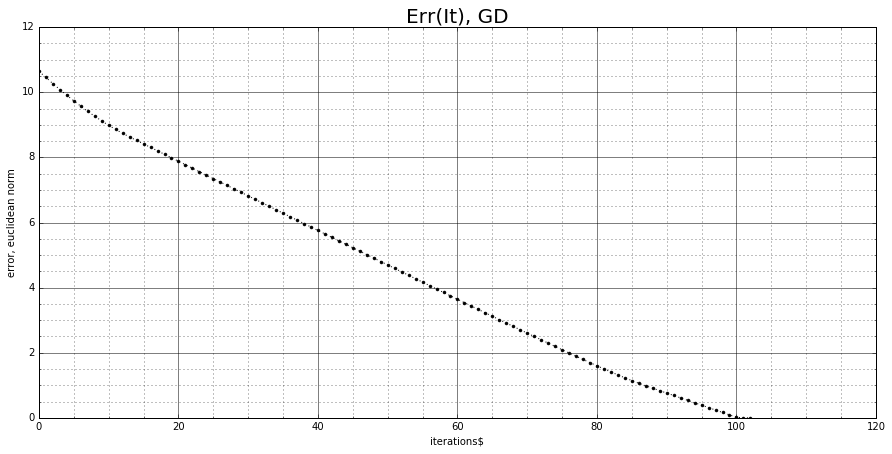

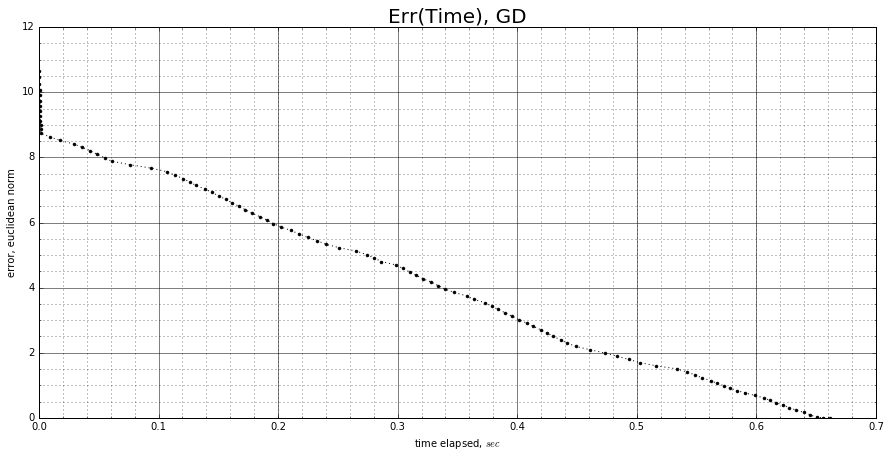

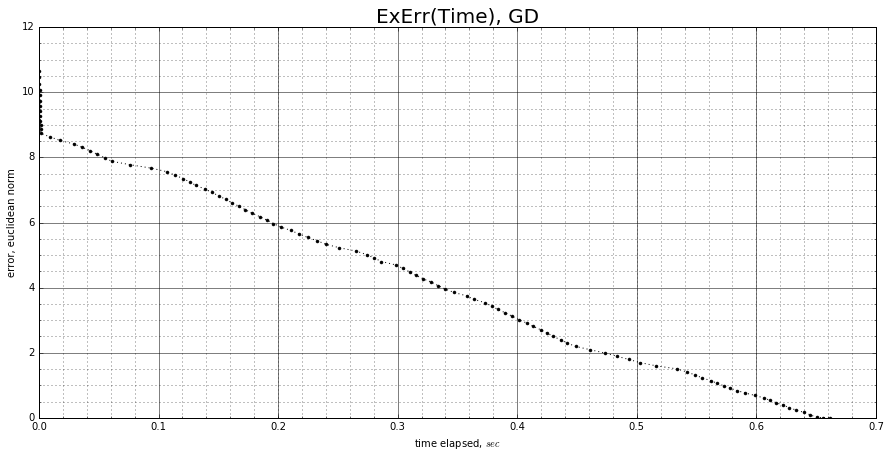

In [27]:
print("---------------Gradient descent-------------------")

# gradient descent solver initialisation
criteria = gd.stop_criterias.ydiff_stop_crit(0.0001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = gd.step_sizes.ConstantStepSize(alpha = 0.3)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), GD")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.,0.]))


-------------------Heavy ball-------------------------


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


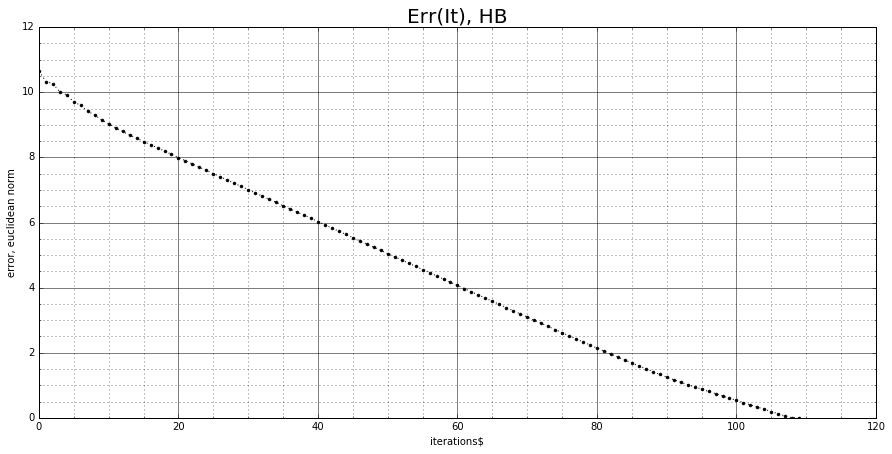

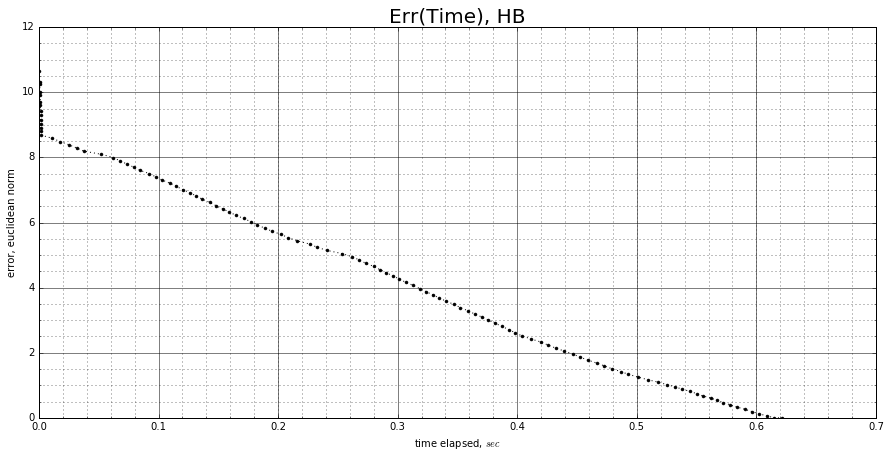

In [28]:
print("-------------------Heavy ball-------------------------")
# heavy ball descent solver initialisation
init_point = np.array([0.,0.,0.])
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
heavy_ball_task = hb.solver(oracle, constraints)
heavy_ball_task.set_init_position(init_point)
heavy_ball_task.set_alpha(0.5, 0.8)

# launch
result = heavy_ball_task.make(criteria)

# result showing
result.ShowIterations("Err(It), HB")
result.ShowTime("Err(Time), HB")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)

Теперь рассмотрим методы второго порядка:

1) Метод внутренней точки

2) Метод Нестерова

-----------------Internal point--------------------


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


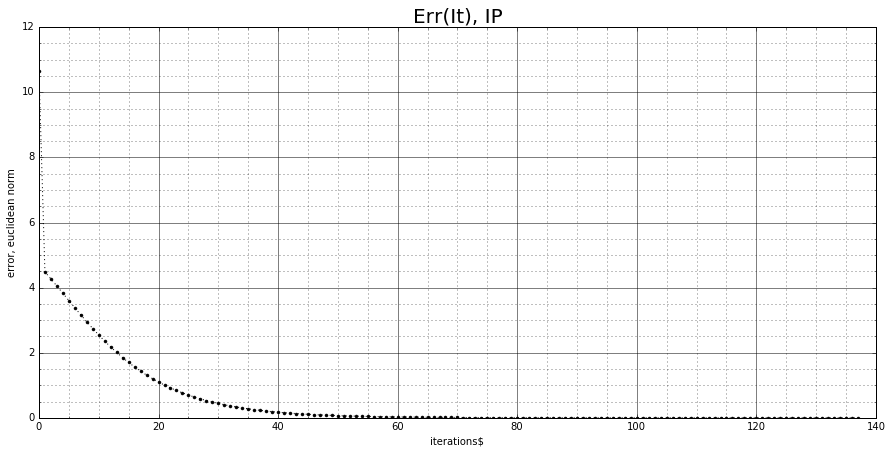

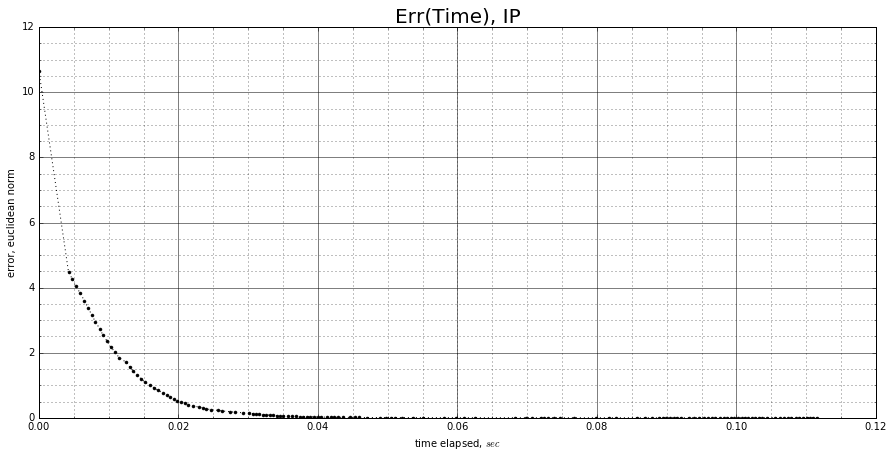

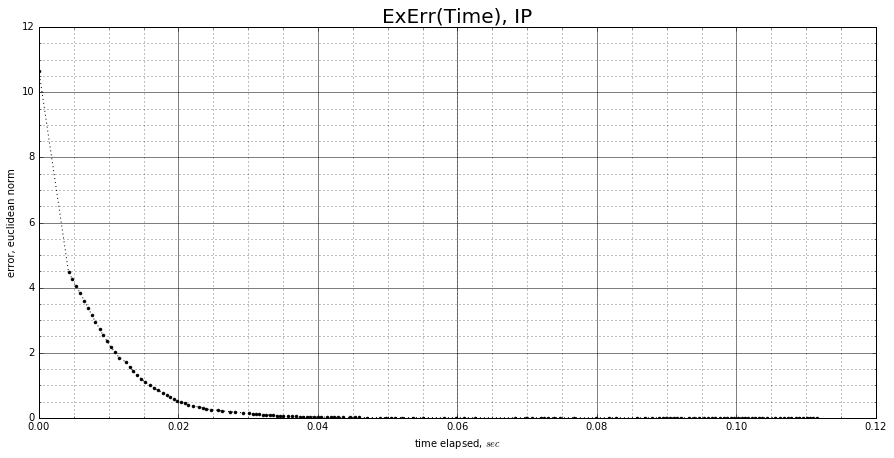

In [8]:
print("-----------------Internal point--------------------")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.,0.]))

# launch
result = internal_point_task.make(tol=0.00001)

# result showing
result.ShowIterations("Err(It), IP")
result.ShowTime("Err(Time), IP")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), IP")

------------------Nesterov--------------------------
[ 1.  0.  0.]
proj [ 1.  0.  0.]
[ 1.5  -0.75 -0.75]
proj [ 1.5  -0.75 -0.75]
[ 3.1  -1.05 -1.05]
proj [ 3.1  -1.05 -1.05]
[ 5.15  -1.575 -1.575]
proj [ 4.70937932 -1.73270681 -1.63311959]
[ 8.23571429 -2.04642857 -2.04642857]
proj [ 5.29798334 -3.16183998 -2.21755384]
[ 12.44553571  -2.66919643  -2.66919643]
proj [ 6.08794277 -5.15217256 -2.80571128]
[ 18.60297331  -3.29352284  -3.35991432]
proj [ 6.94186636 -7.30366524 -3.44149268]
[ 28.91646629  -3.38570085  -4.15956666]
proj [ 6.94186636 -7.30366524 -3.44149268]


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


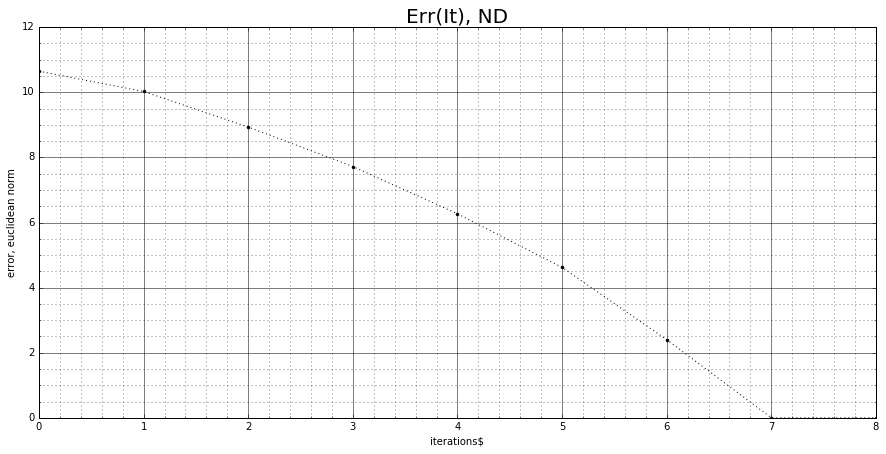

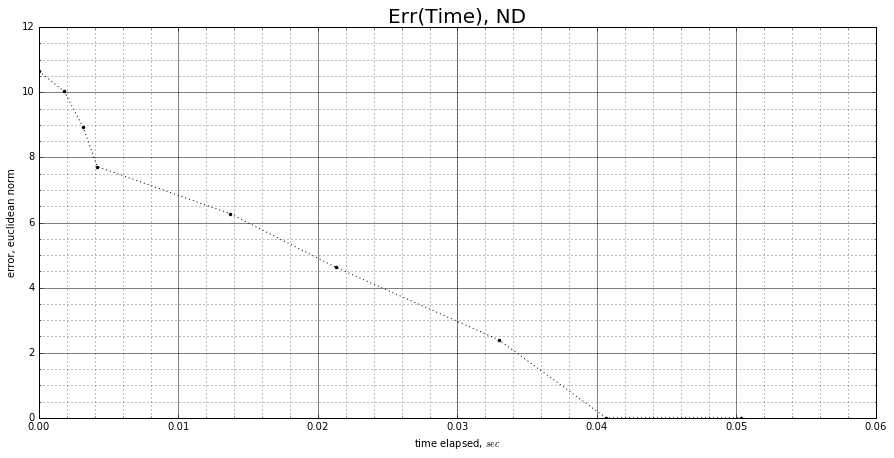

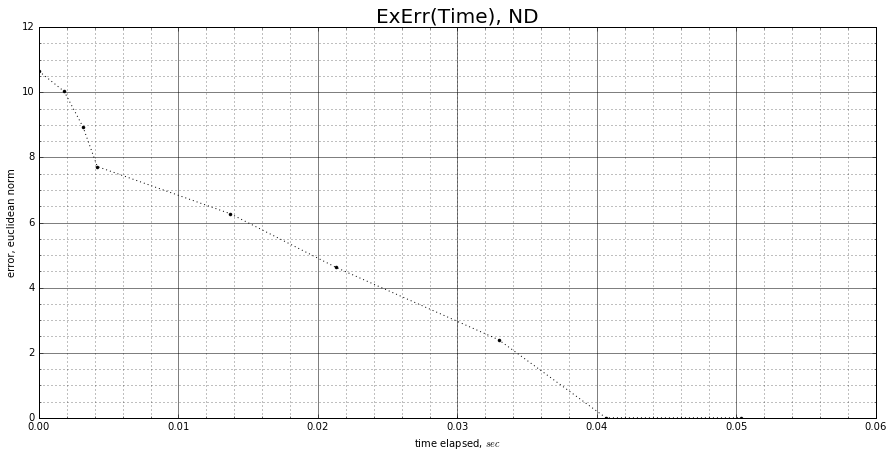

In [9]:
print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(np.array([0.,0.,0.]))
stp_size = nst.step_sizes.ConstantStepSize(alpha = 1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")
exact_solution = np.array([6.941866360728454, -7.303665236134947, -3.441492677150564])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), ND")



Выводы: метод Нестерова, как и ожидалось от него, работает быстрее всего. 


In [30]:
# task 2 initialisation
F = np.array([
    [-1, 1],
    [1, -1],
    [0, 1],
    [1, 0]
])
g = np.array([1, 1, 3, 3])
a = np.array([1, 1])
b = 1
c = np.array([1, 1])
d = 1

oracle = task_2.first_order_oracle(a, b, c, d)
oracle_2 = task_2.second_order_oracle(a, b, c, d)
constraints = task_2.constraints(F, g, c, d)


Рассмотрим методы первого порядка, которые мы реализовали.

1)Обычный градиентный спуск

2)Методы тяжёлого шарика

---------------Gradient descent-------------------


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


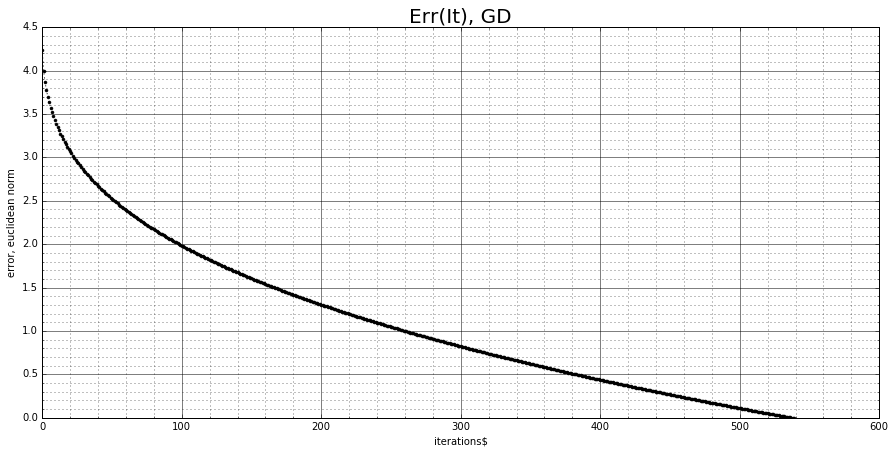

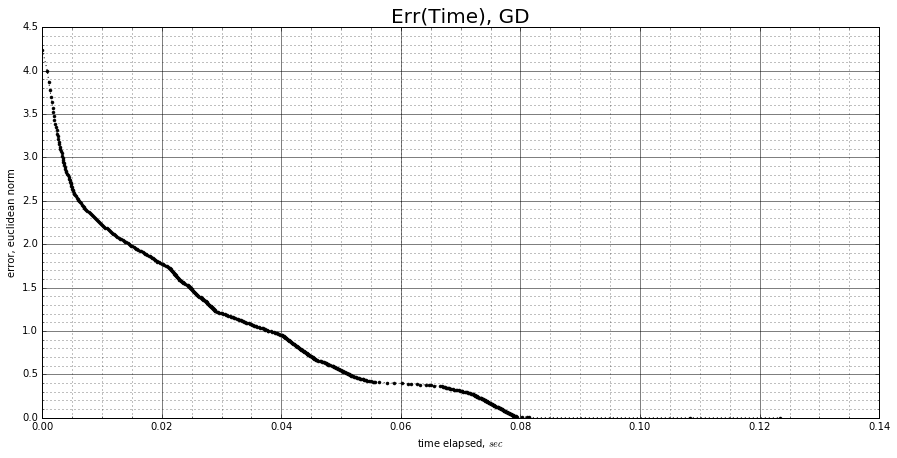

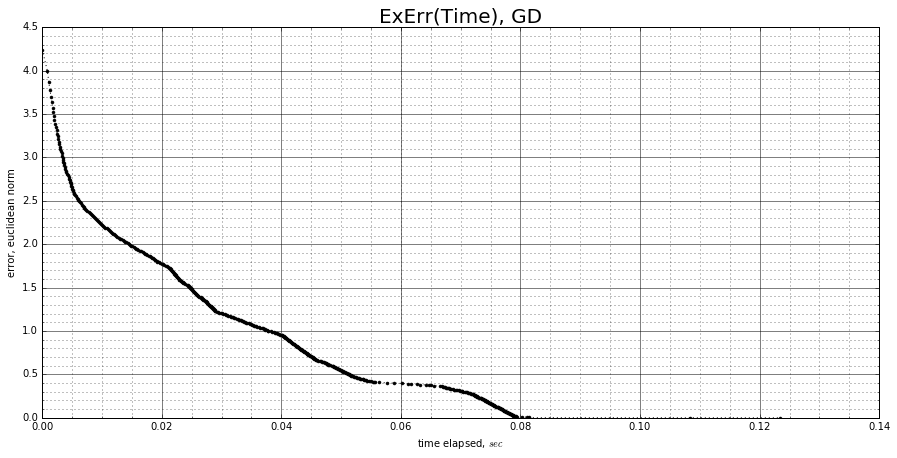

In [13]:
print("---------------Gradient descent-------------------")
# gradient descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = gd.stop_criterias.ydiff_stop_crit(0.00001)
gradient_descent_task = gd.solver(oracle, constraints)
gradient_descent_task.set_init_position(init_point)
stp_size = gd.step_sizes.ArmijoStepSize(oracle, constraints, init_alpha = 0.1)
gradient_descent_task.set_step_size(stp_size)

# launch
result = gradient_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), GD")
result.ShowTime("Err(Time), GD")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), GD")

-------------------Heavy ball-------------------------


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


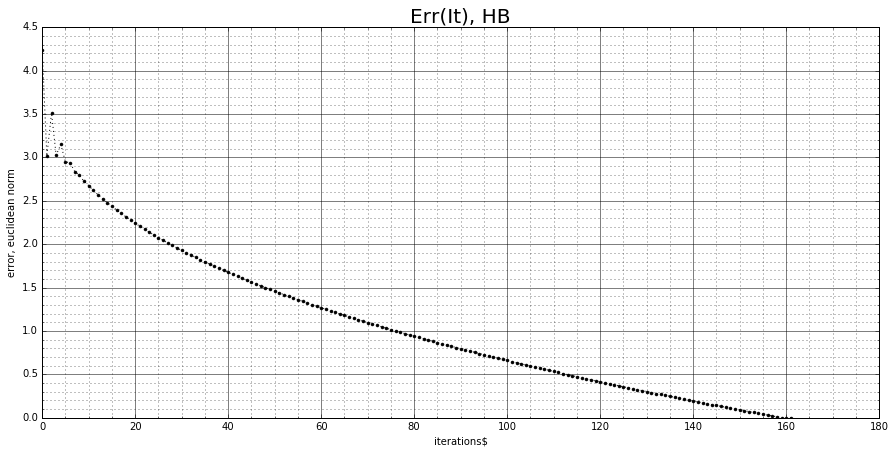

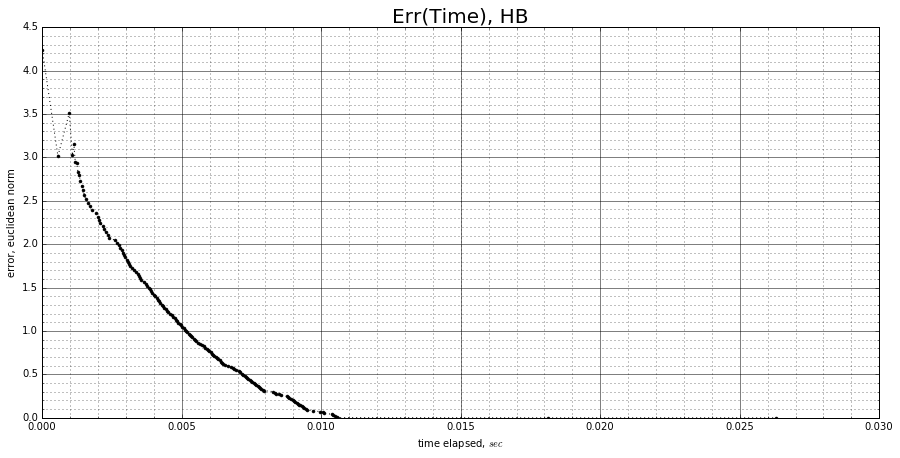

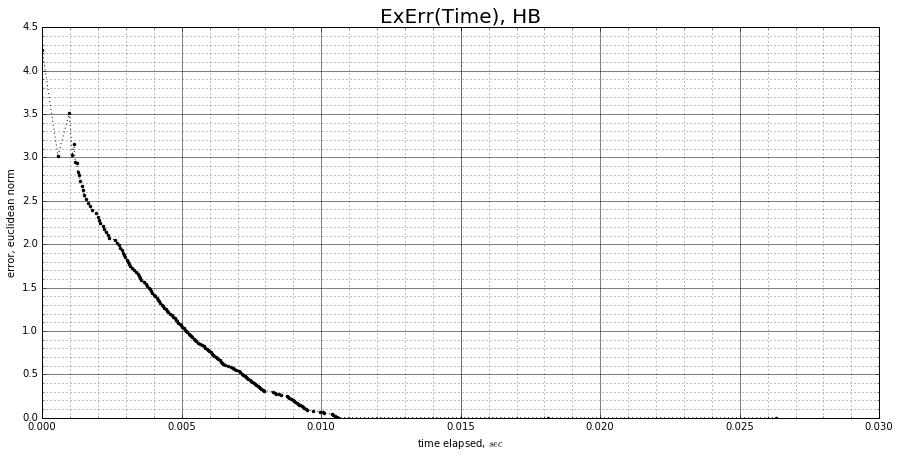

In [31]:
print("-------------------Heavy ball-------------------------")
# heavy ball descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
heavy_ball_task = hb.solver(oracle, constraints)
heavy_ball_task.set_init_position(init_point)
heavy_ball_task.set_alpha(0.5, 0.5)

# launch
result = heavy_ball_task.make(criteria)

# result showing
result.ShowIterations("Err(It), HB")
result.ShowTime("Err(Time), HB")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), HB")


На этой, более сложной задаче, уже видно, что метод тяжёлого шарика работает быстрее обычного градиентного спуска (несмотря на небольшие осцилляции в начале). Он сходится примерно в 3 раза быстрее, чем градиентный спуск.

Теперь рассмотрим методы второго порядка:

1) Метод внутренней точки

2) Метод Нестерова

-----------------Internal point--------------------


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


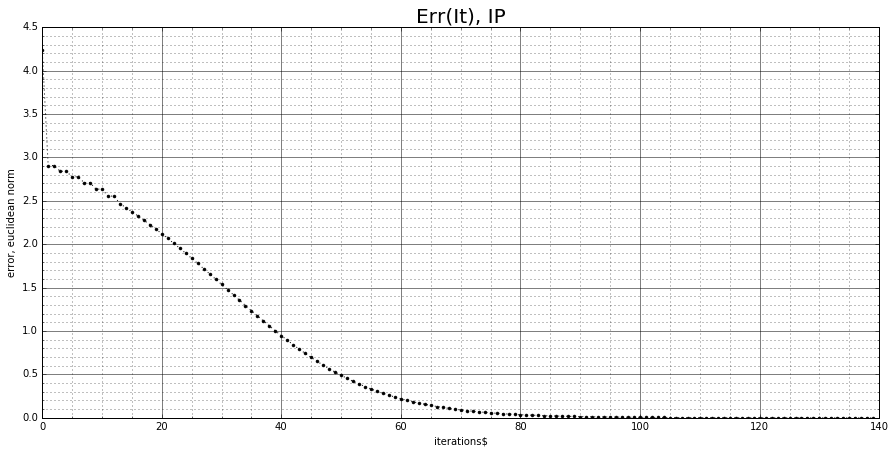

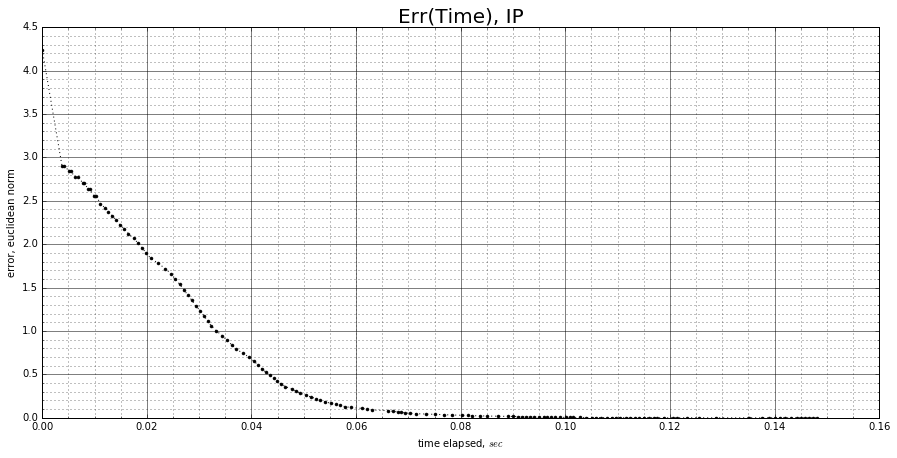

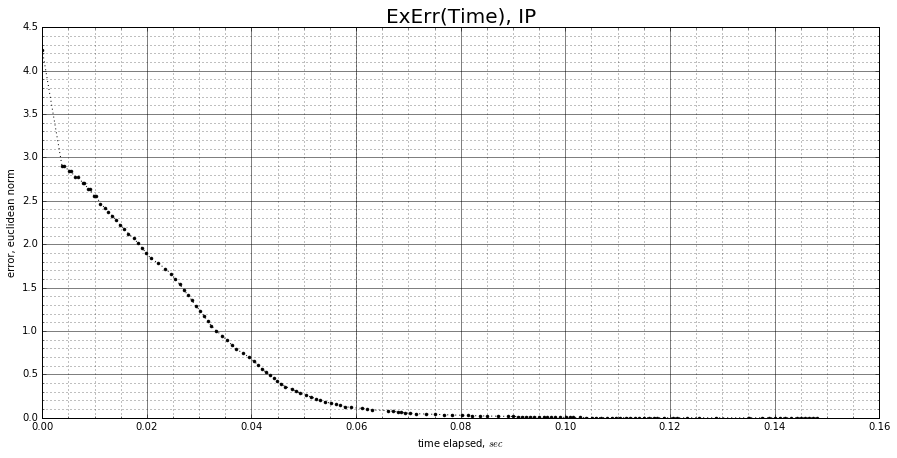

In [14]:
print("-----------------Internal point--------------------")

# internal point solver initialisation
internal_point_task = ip.solver(constraints, oracle_2)
internal_point_task.set_init_log_barrier_coeff(t=1)
internal_point_task.set_init_position(np.array([0.,0.]))

# launch
result = internal_point_task.make(tol=0.00001)

# result showing
result.ShowIterations("Err(It), IP")
result.ShowTime("Err(Time), IP")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), IP")

------------------Nesterov--------------------------
[ 0.17357589  0.17357589]
proj [ 0.17357589  0.17357589]
[-0.19430434 -0.19430434]
proj [-0.19430434 -0.19430434]
[ 0.22940164  0.22940164]
proj [ 0.22940164  0.22940164]
[ 0.33116921  0.33116921]
proj [ 0.33116921  0.33116921]
[ 0.68590348  0.68590348]
proj [ 0.68590348  0.68590348]
[ 0.99458638  0.99458638]
proj [ 0.99458638  0.99458638]
[ 1.45030322  1.45030322]
proj [ 1.45030322  1.45030322]
[ 1.9926072  1.9926072]
proj [ 1.9926072  1.9926072]
[ 2.72262898  2.72262898]
proj [ 2.72262898  2.72262898]
[ 3.679309  3.679309]
proj [ 3.  3.]
[ 4.97882763  4.97882763]
proj [ 3.  3.]


D:\Programms\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


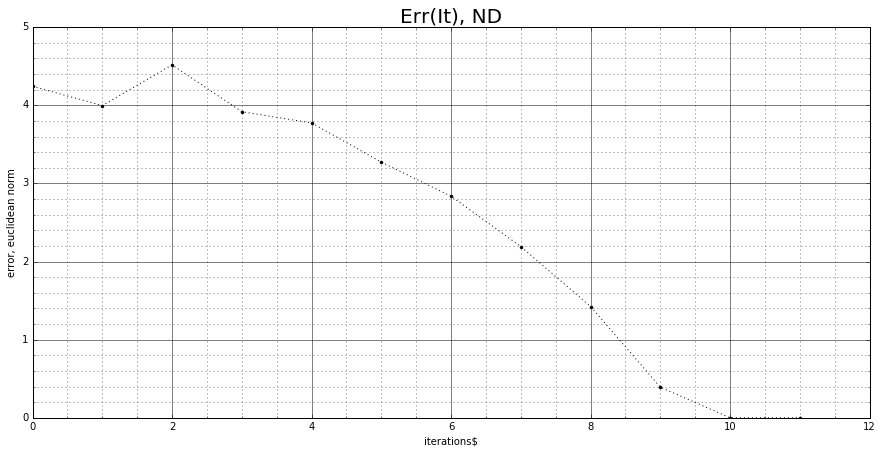

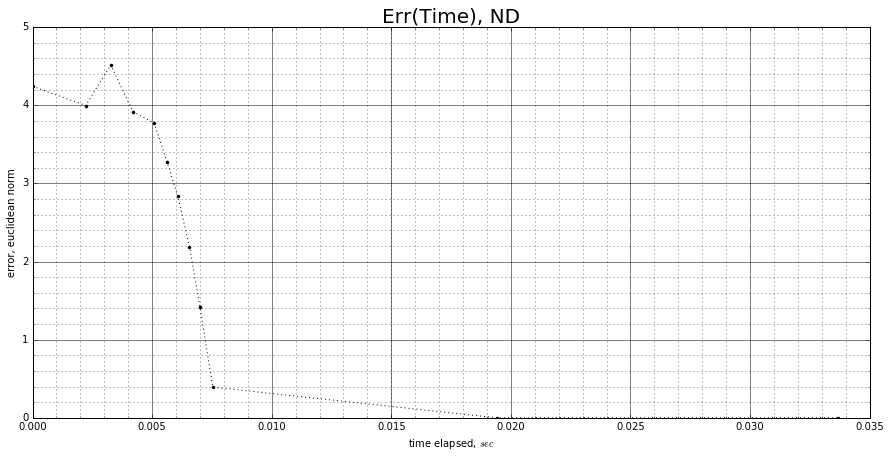

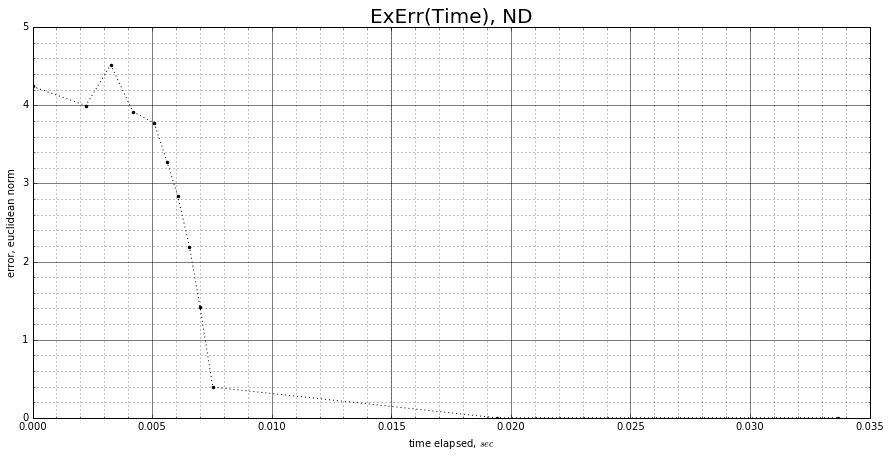

In [18]:
print("------------------Nesterov--------------------------")

# nesterov descent solver initialisation
init_point = constraints.projection(np.array([0, 0]))
criteria = nst.stop_criterias.ydiff_stop_crit(0.00001)
nesterov_descent_task = nst.solver(oracle, constraints)
nesterov_descent_task.set_init_position(init_point)
stp_size = nst.step_sizes.ConstantStepSize(alpha=0.1)
nesterov_descent_task.set_step_size(stp_size)

# launch
result = nesterov_descent_task.make(criteria)

# result showing
result.ShowIterations("Err(It), ND")
result.ShowTime("Err(Time), ND")
exact_solution = np.array([3., 3.])
result.InitializeExactSolution(exact_solution)
result.ShowTime("ExErr(Time), ND")

Как мы видим, хоть метод Нестерова не является монотонным, он сходится гораздо быстрее остальных методов, меньше чем за 10 итераций, что обусловленно дороговизной каждой операции, так как используем вторую производную.